# VQPCA clustering of the Burke-Schumann manifold

In this notebook we run VQPCA clustering algorithm on a Burke-Schumann manifold for burning methane in air.

In [1]:
import numpy as np
import pandas as pd

# Import pyMORe modules:
import pyMORe.clustering as clustering
import pyMORe.utilities as utilities
import pyMORe.model_order_reduction as model_order_reduction
import matplotlib
import matplotlib.pyplot as plt

# Import plotting modules:
import plotting.manifolds

Import Burke-Schumann data set:

In [2]:
X_BS = pd.read_csv('/Users/kamilazdybal/GitLab-Multiscale-Utah/manifolds-analysis/raw_data_BS_1000000/X_BS_1000000_snrinf.csv', sep = ',', header=None).to_numpy()
Z = pd.read_csv('/Users/kamilazdybal/GitLab-Multiscale-Utah/manifolds-analysis/Z_1000000.csv', sep = ',', header=None).to_numpy()
X_BS = X_BS[:,0:-1]
print(np.shape(X_BS))

(1000000, 5)


Run VQPCA partitioning:

Preprocessing training matrix..
Fitting Local PCA model...
- Iteration number: 1
	Reconstruction error: 1.1445613777844768
	Reconstruction error variance: 0.12630286203113353
- Iteration number: 2
	Reconstruction error: 4.307615300585804e-11
	Reconstruction error variance: 26570649834.625404
- Iteration number: 3
	Reconstruction error: 3.497361627021049e-20
	Reconstruction error variance: 1231675690.5569253
	An empty cluster was found:
	The number of cluster was lowered to ensure statistically meaningful results.
	The current number of clusters is equal to: 1
- Iteration number: 4
	Reconstruction error: 9.325884884240402e-26
	Reconstruction error variance: 375015.59847111773
- Iteration number: 5
	Reconstruction error: 9.325884884240402e-26
	Reconstruction error variance: 1e-16
Convergence reached in 4 iterations.


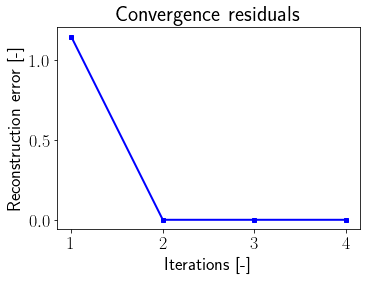

In [3]:
settings = {
    "center"                    : True,
    "centering_method"          : "mean",
    "scale"                     : True,
    "scaling_method"            : "auto",

    "number_of_clusters"        : 3,
    "number_of_eigenvectors"    : 1,

    "adaptive_PCs"              : False,
    "correction_factor"         : "off",
                                        
    "initialization_method"     : "random",
    "classify"                  : False,
    "write_on_txt"              : False,
    "evaluate_clustering"       : True,
}

model = clustering.lpca(X_BS, settings)

idx = model.fit()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


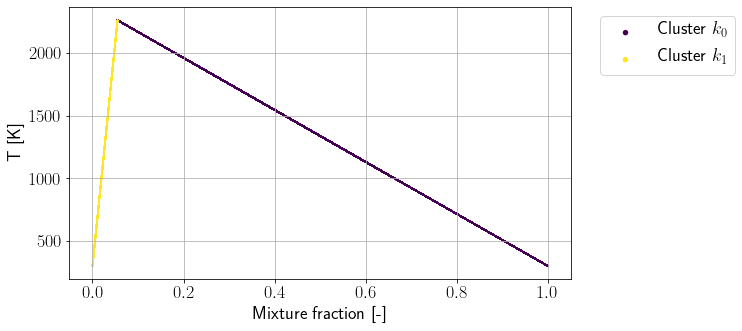

In [4]:
plotting.manifolds.plot_2d_manifold_clustering(Z[:,0], X_BS[:,0], idx, x_name='Mixture fraction [-]', y_name='T [K]')